## **Fetching data**

In [8]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d tongpython/cat-and-dog

 92% 201M/218M [00:07<00:00, 20.8MB/s]
100% 218M/218M [00:07<00:00, 32.0MB/s]


In [11]:
!mkdir kaggle

mkdir: cannot create directory ‘kaggle’: File exists


In [12]:
! unzip cat-and-dog.zip -d kaggle

Streaming output truncated to the last 5000 lines.
  inflating: kaggle/training_set/training_set/cats/cat.3705.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.3706.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.3707.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.3708.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.3709.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.371.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.3710.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.3711.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.3712.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.3713.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.3714.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.3715.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.3716.jpg  
  inflating: kaggle/training_set/training_set/cats/cat.3717.jpg  
  inflating: kaggle/traini

## **import**

In [13]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
from sklearn.metrics import accuracy_score
import time

## **Display**

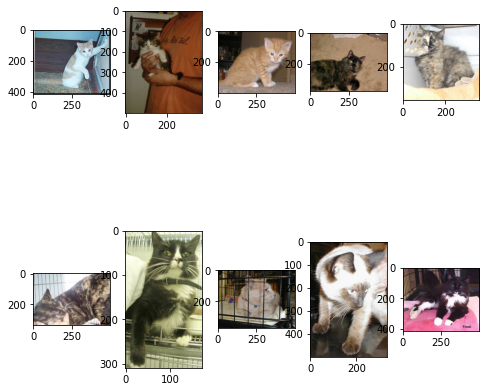

In [14]:
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    filename = "kaggle/test_set/test_set/cats/cat." + str(4000+i) + ".jpg"
    img = imread(filename)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

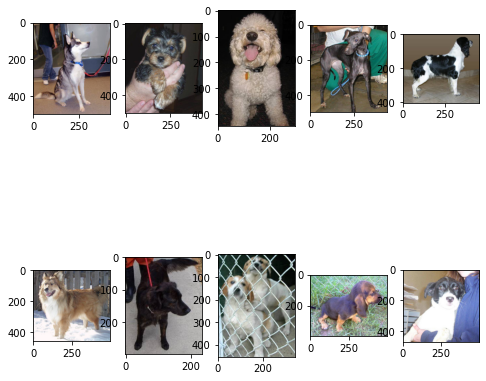

In [15]:
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    filename = "kaggle/test_set/test_set/dogs/dog." + str(4000+i) + ".jpg"
    img = imread(filename)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## **Main function**

In [16]:
run_time = []
accTrain = []
accTest = []

In [17]:
def regFun(length, breadth,max_iter):
    start = time.time()
    X=[]
    y=[]

    for i in range(1, 100):
        filename = "kaggle/test_set/test_set/cats/cat." + str(4000+i) + ".jpg"
        img = imread(filename)
        img = cv2.resize(img, (length, breadth)) 
        img = img.flatten()
        X.append(img)
        y.append(0) 

    for i in range(1, 100):
        filename = "kaggle/test_set/test_set/dogs/dog." + str(4000+i) + ".jpg"
        img = imread(filename)
        img = cv2.resize(img, (length, breadth))
        img = img.flatten()
        X.append(img)
        y.append(1) 

    X = np.array(X)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

    model = LogisticRegression()
    model.max_iter = max_iter
    model.fit(X_train,y_train)
    print("Model Fit Successfully")

    y_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train,y_pred)
    print("Test accuracy score:", acc_train)
    accTrain.append(acc_train)

    y_pred_test = model.predict(X_test)
    acc_test = accuracy_score(y_test,y_pred_test)
    print("Test accuracy score:", acc_test)
    accTest.append(acc_test)

    end = time.time()
    print("Running time:", end-start)
    run_time.append(end-start)

### **Images of 500,500 size**

In [18]:
regFun(500,500,100)

Model Fit Successfully
Test accuracy score: 1.0
Test accuracy score: 0.58
Running time: 13.524998188018799


### **Images of 100,100 size**

In [19]:
regFun(100,100,200)

Model Fit Successfully
Test accuracy score: 1.0
Test accuracy score: 0.46
Running time: 3.0003013610839844


### **Images of 50,50 size**

In [20]:
regFun(50,50,200)

Model Fit Successfully
Test accuracy score: 1.0
Test accuracy score: 0.48
Running time: 1.1192243099212646


### **Images of 25,25 size**

In [21]:
regFun(25,25,300)

Model Fit Successfully
Test accuracy score: 1.0
Test accuracy score: 0.44
Running time: 0.8300607204437256


### **Images of 10,10 size**

In [22]:
regFun(10,10,400)

Model Fit Successfully
Test accuracy score: 1.0
Test accuracy score: 0.58
Running time: 0.8571979999542236


## **Plotting**

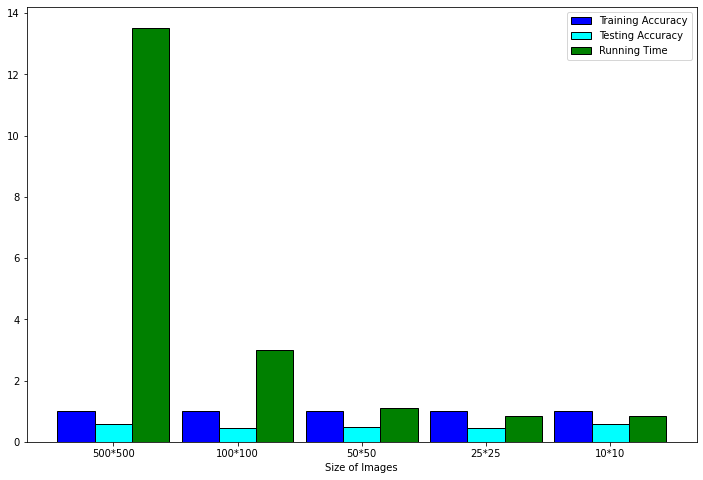

In [23]:
barWidth = 0.3

r1 = np.arange(len(accTrain))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
fig = plt.subplots(figsize =(12, 8)) 

plt.bar(r1, accTrain, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Training Accuracy')
 
plt.bar(r2, accTest, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='Testing Accuracy')

plt.bar(r3, run_time, width = barWidth, color = 'green', edgecolor = 'black', capsize=7, label='Running Time')

plt.xticks([r + barWidth for r in range(len(accTrain))], ['500*500', '100*100', '50*50','25*25','10*10'])
plt.xlabel('Size of Images')
plt.legend()

plt.show()